In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from sklearn.metrics import accuracy_score

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [23]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [24]:
x_train[0].shape

(28, 28)

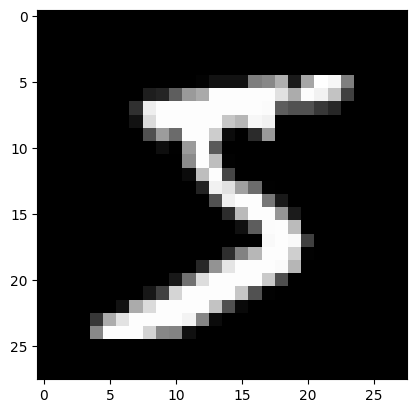

In [25]:
plt.imshow(x_train[0], cmap='gray')

In [26]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

In [68]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28))) # Input layer
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(10, activation='softmax')) # Output layer

C:\Users\Parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 36)                  │           4,644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,494 (412.09 KB)

 Trainable params: 105,494 (412.09 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [71]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8630 - loss: 0.4838 - val_accuracy: 0.9516 - val_loss: 0.1580
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9603 - loss: 0.1327 - val_accuracy: 0.9663 - val_loss: 0.1088
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9745 - loss: 0.0821 - val_accuracy: 0.9697 - val_loss: 0.0998
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9814 - loss: 0.0603 - val_accuracy: 0.9697 - val_loss: 0.1034
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9865 - loss: 0.0429 - val_accuracy: 0.9694 - val_loss: 0.1127
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9892 - loss: 0.0340 - val_accuracy: 0.9727 - val_loss: 0.1074
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9745 - val_loss: 0.1012
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9939 - loss: 0.0211 - 

In [72]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [73]:
predictions

array([[4.66709310e-11, 4.59241499e-11, 1.49578696e-07, ...,
        9.99999404e-01, 1.03685491e-10, 1.44650014e-09],
       [2.79516002e-15, 1.21616823e-08, 1.00000000e+00, ...,
        2.15600006e-20, 3.12706216e-09, 3.11393757e-21],
       [1.66066314e-07, 9.99612153e-01, 8.44135570e-07, ...,
        3.43868087e-05, 2.82174471e-04, 4.42948647e-07],
       ...,
       [1.10909723e-14, 4.01342067e-12, 1.45732813e-17, ...,
        3.98734344e-11, 3.10320303e-07, 4.89469159e-08],
       [2.09635400e-16, 1.17588338e-19, 1.39998574e-19, ...,
        9.40807634e-17, 1.79219994e-09, 1.00146264e-14],
       [6.13347806e-13, 2.88586333e-19, 3.09090131e-17, ...,
        2.69693825e-26, 1.01055676e-16, 6.66959202e-18]], dtype=float32)

In [74]:
y_pred = predictions.argmax(axis=1)

In [75]:
accuracy_score(y_test, y_pred)

0.9716

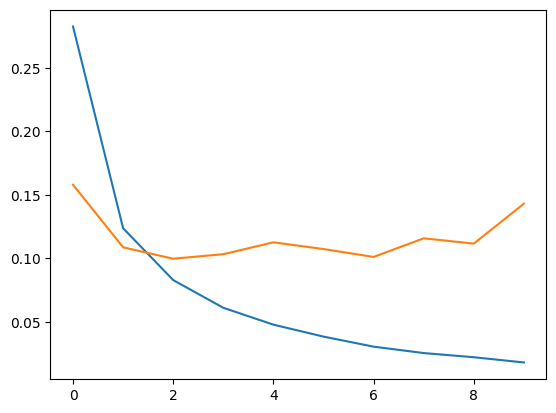

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

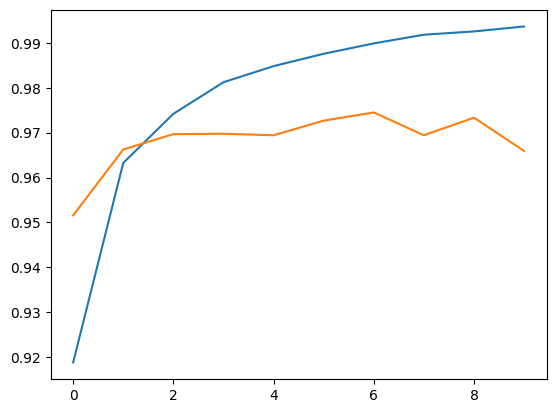

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([7])

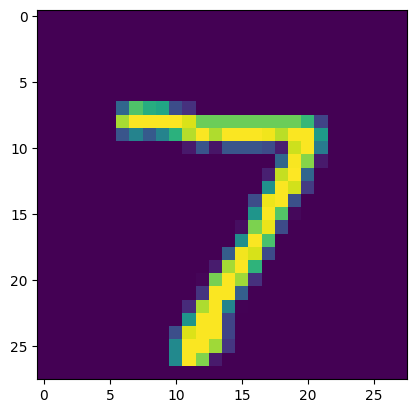

In [78]:
plt.imshow(x_test[0])
model.predict(x_test[0].reshape(1, 28, 28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([2])

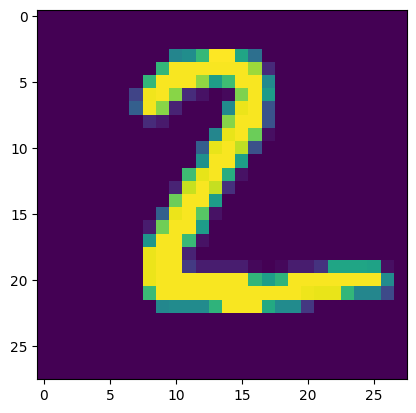

In [79]:
plt.imshow(x_test[1])
model.predict(x_test[1].reshape(1, 28, 28)).argmax(axis=1)